# Motor Vehicle Collisions - Crashes
Datos sobre accidentes vehiculares en la ciudad de Nueva York
Datos hasta agosto de 2024

# Carga de datos
Una vez que tengamos nuestros datos del archivo 'Motor_Vehicle_Collisions_-_Crashes_20241009.csv', lo siguiente será localizarlos en la carpeta del proyecto, posteriormente haciendo uso de la libreria pandas, leeremos el documento y crearemos un nuevo objeto 'df' que contendra estos datos. Una vez completado podremos ver los datos.

In [ ]:
pip install geopandas
pip install geodatasets
pip install folium

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from geodatasets import get_path
import folium
from folium import plugins

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df = pd.read_csv('./Motor_Vehicle_Collisions_-_Crashes_20241008.csv')
df

C:\Users\alegm\AppData\Local\Temp\ipykernel_8148\755350310.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Motor_Vehicle_Collisions_-_Crashes_20241008.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124638,08/06/2024,12:00,QUEENS,11001.0,NaN,NaN,NaN,JAMAICA AVENUE,LITTLE NECK PARKWAY,NaN,...,Unspecified,NaN,NaN,NaN,4746496,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2124639,08/05/2024,5:00,QUEENS,11434.0,NaN,NaN,NaN,132 AVENUE,155 STREET,NaN,...,NaN,NaN,NaN,NaN,4746463,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2124640,07/29/2024,2:30,NaN,NaN,40.723442,-73.938990,"(40.723442, -73.93899)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4746455,Tractor Truck Diesel,Sedan,NaN,NaN,NaN
2124641,08/02/2024,15:48,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4746469,Sedan,Pick-up Truck,NaN,NaN,NaN


## NaN
Removemos los NaN de los datos para que no se propaguen y no causen problemas futuros 

In [3]:
df = df.fillna('0')
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,0,0,0,0,0,WHITESTONE EXPRESSWAY,20 AVENUE,0,...,Unspecified,0,0,0,4455765,Sedan,Sedan,0,0,0
1,03/26/2022,11:45,0,0,0,0,0,QUEENSBORO BRIDGE UPPER,0,0,...,0,0,0,0,4513547,Sedan,0,0,0,0
2,06/29/2022,6:55,0,0,0,0,0,THROGS NECK BRIDGE,0,0,...,Unspecified,0,0,0,4541903,Sedan,Pick-up Truck,0,0,0
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",0,0,1211 LORING AVENUE,...,0,0,0,0,4456314,Sedan,0,0,0,0
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0,...,0,0,0,0,4486609,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124638,08/06/2024,12:00,QUEENS,11001.0,0,0,0,JAMAICA AVENUE,LITTLE NECK PARKWAY,0,...,Unspecified,0,0,0,4746496,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
2124639,08/05/2024,5:00,QUEENS,11434.0,0,0,0,132 AVENUE,155 STREET,0,...,0,0,0,0,4746463,Station Wagon/Sport Utility Vehicle,0,0,0,0
2124640,07/29/2024,2:30,0,0,40.723442,-73.93899,"(40.723442, -73.93899)",BROOKLYN QUEENS EXPRESSWAY,0,0,...,Unspecified,0,0,0,4746455,Tractor Truck Diesel,Sedan,0,0,0
2124641,08/02/2024,15:48,0,0,0,0,0,THROGS NECK BRIDGE,0,0,...,Unspecified,0,0,0,4746469,Sedan,Pick-up Truck,0,0,0


## Cantidad de accidentes por ciudad
procedemos a crear otro dataframe pero ahora con los datos de las ciudades, posteriormente contaremos cuantos registros tiene cada ciudad y finalmente lo graficamos para ver los datos de manera mas clara.

In [5]:
cities = df['BOROUGH']

In [6]:
cities_counts = df['BOROUGH'].value_counts()

In [7]:
citiesTotal= {'Brooklyn': cities_counts.get('BROOKLYN',0),
             'Bronx': cities_counts.get('BRONX',0),
             'Manhattan': cities_counts.get('MANHATTAN',0),
             'Queens': cities_counts.get('QUEENS',0),
             'StatenIsland': cities_counts.get('STATEN ISLAND',0),
             'Not Available': cities_counts.get('0',0
                                               )}

In [8]:
ocurrences = cities.unique()

In [9]:
citiesTotal
citiesTotal_Df = DataFrame.from_dict(citiesTotal, orient = 'index', columns=['Count'])



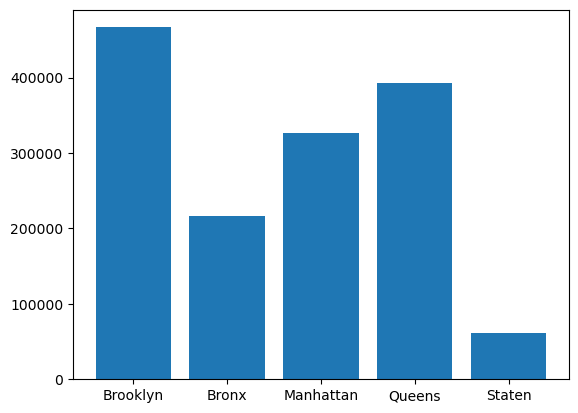

In [10]:
names = ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten']
values = [
    citiesTotal_Df.loc['Brooklyn', 'Count'],
    citiesTotal_Df.loc['Bronx', 'Count'],
    citiesTotal_Df.loc['Manhattan', 'Count'],
    citiesTotal_Df.loc['Queens', 'Count'],
    citiesTotal_Df.loc['StatenIsland', 'Count'],
]
plt.bar(names, values)
plt.show()

# Queens
## Numero de accidentes por calle en Queens
Comenzando con la ciudad de Queens, realizaremos un dataframe con los registros en esta ciudad, calcularemos el promedio de accidentes y graficaremos las calles con mayor cantidad de accidentes.

In [11]:
df_queens = df.loc[df['BOROUGH']=='QUEENS']
df_queens['ON STREET NAME'] = df_queens['ON STREET NAME'].replace('0', 'UNKNOWN')
df_queens

C:\Users\alegm\AppData\Local\Temp\ipykernel_9000\219992538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_queens['ON STREET NAME'] = df_queens['ON STREET NAME'].replace('0', 'UNKNOWN')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
11,12/14/2021,16:50,QUEENS,11413.0,40.675884,-73.75577,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0,...,Unspecified,0,0,0,4487127,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
14,12/14/2021,23:10,QUEENS,11434.0,40.66684,-73.78941,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET,0,...,Unspecified,0,0,0,4486635,Sedan,Sedan,0,0,0
22,12/13/2021,6:30,QUEENS,11372.0,40.75373,-73.88505,"(40.75373, -73.88505)",82 STREET,34 AVENUE,0,...,0,0,0,0,4486967,Sedan,0,0,0,0
30,12/12/2021,9:00,QUEENS,11385.0,40.70447,-73.90148,"(40.70447, -73.90148)",UNKNOWN,0,59-14 67 AVENUE,...,Unspecified,0,0,0,4486933,Station Wagon/Sport Utility Vehicle,0,0,0,0
44,04/24/2022,6:00,QUEENS,11411.0,0.0,0.0,"(0.0, 0.0)",UNKNOWN,0,116-44 234 STREET,...,Unspecified,0,0,0,4521460,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124625,08/06/2024,7:00,QUEENS,11375.0,0,0,0,HORACE HARDING EXPRESSWAY,WALDRON STREET,0,...,Unspecified,0,0,0,4746058,Box Truck,Sedan,0,0,0
2124628,08/06/2024,20:58,QUEENS,11367.0,0,0,0,MAIN STREET,UNION TURNPIKE,0,...,0,0,0,0,4745943,Sedan,0,0,0,0
2124635,08/04/2024,23:30,QUEENS,11105.0,0,0,0,STEINWAY STREET,21 AVENUE,0,...,Unspecified,0,0,0,4746565,Sedan,Bike,0,0,0
2124638,08/06/2024,12:00,QUEENS,11001.0,0,0,0,JAMAICA AVENUE,LITTLE NECK PARKWAY,0,...,Unspecified,0,0,0,4746496,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0


In [12]:
cont_calles_queens = df_queens['ON STREET NAME'].value_counts()
cont_calles_queens

UNKNOWN                             83023
NORTHERN BOULEVARD                   8852
QUEENS BOULEVARD                     6732
WOODHAVEN BOULEVARD                  4368
HILLSIDE AVENUE                      4052
                                    ...  
Junction boulevard                      1
213 street                              1
Jordan St                               1
utopia parkway                          1
89 ROAD                                 1
Name: ON STREET NAME, Length: 4423, dtype: int64

In [13]:
promedio_calles_queens = cont_calles_queens.mean()
promedio_calles_queens

88.77345692968574

In [14]:
top_calles_queens = cont_calles_queens.head(8)
top_calles_queens

UNKNOWN                             83023
NORTHERN BOULEVARD                   8852
QUEENS BOULEVARD                     6732
WOODHAVEN BOULEVARD                  4368
HILLSIDE AVENUE                      4052
NORTH CONDUIT AVENUE                 3951
JAMAICA AVENUE                       3499
ROCKAWAY BOULEVARD                   3436
Name: ON STREET NAME, dtype: int64

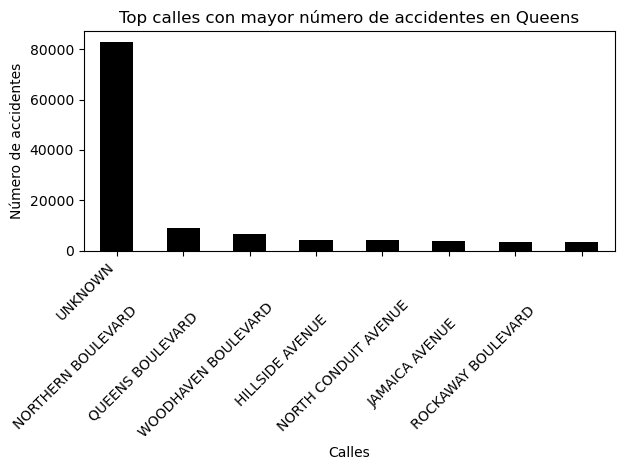

In [15]:
plt.figure()
top_calles_queens.plot(kind='bar', color='black')
plt.title('Top calles con mayor número de accidentes en Queens')
plt.xlabel('Calles')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
top_calles_queens = cont_calles_queens.head(8).iloc[1:]
top_calles_queens

NORTHERN BOULEVARD                  8852
QUEENS BOULEVARD                    6732
WOODHAVEN BOULEVARD                 4368
HILLSIDE AVENUE                     4052
NORTH CONDUIT AVENUE                3951
JAMAICA AVENUE                      3499
ROCKAWAY BOULEVARD                  3436
Name: ON STREET NAME, dtype: int64

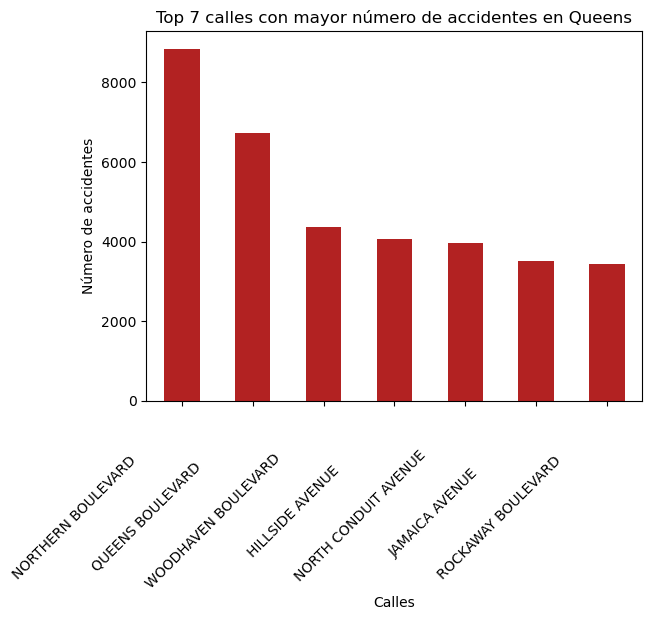

In [17]:
plt.figure()
top_calles_queens.plot(kind='bar', color='firebrick')
plt.title('Top 7 calles con mayor número de accidentes en Queens')
plt.xlabel('Calles')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.show()

## Numero de accidentes por tipo de coche en Queens

In [18]:
cont_coches_queens = df_queens['VEHICLE TYPE CODE 1'].value_counts()
cont_coches_queens

Sedan                                  109350
Station Wagon/Sport Utility Vehicle     93901
PASSENGER VEHICLE                       89081
SPORT UTILITY / STATION WAGON           38074
4 dr sedan                               7408
                                        ...  
Unkno                                       1
12 Pa                                       1
FRHT                                        1
FED E                                       1
U-HAUL                                      1
Name: VEHICLE TYPE CODE 1, Length: 538, dtype: int64

In [19]:
top_coches_queens = cont_coches_queens.head(8)
top_coches_queens

Sedan                                  109350
Station Wagon/Sport Utility Vehicle     93901
PASSENGER VEHICLE                       89081
SPORT UTILITY / STATION WAGON           38074
4 dr sedan                               7408
Pick-up Truck                            6533
UNKNOWN                                  4501
Taxi                                     4054
Name: VEHICLE TYPE CODE 1, dtype: int64

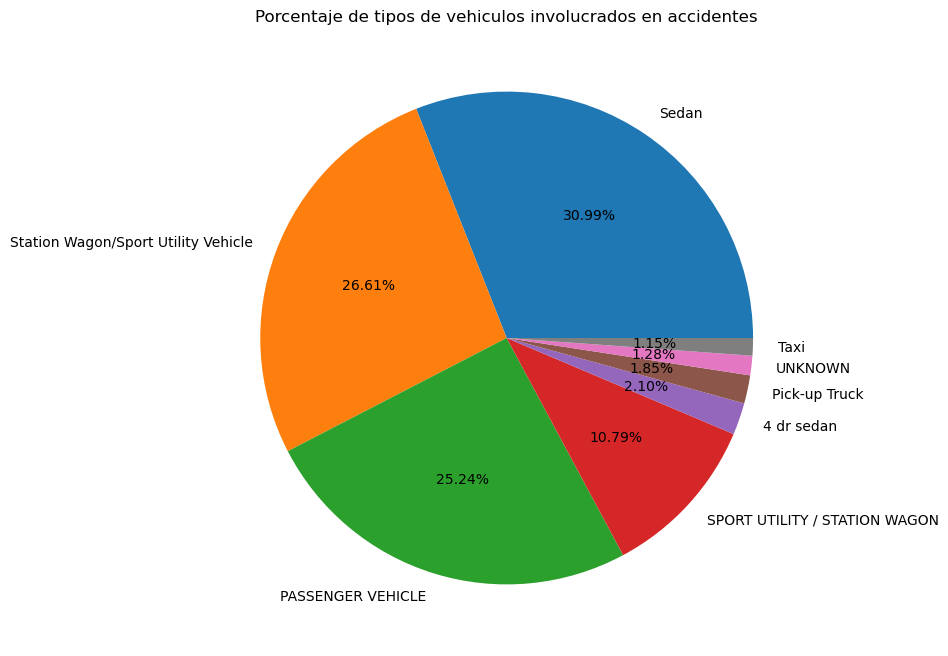

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(top_coches_queens,labels=top_coches_queens.index,autopct='%1.2f%%')
plt.title("Porcentaje de tipos de vehiculos involucrados en accidentes")
plt.show()

In [7]:
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

In [8]:
dataCoord = df[(df['LATITUDE'] != 0)&(df['LONGITUDE'] != 0)]
dataCoord

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",0,0,1211 LORING AVENUE,...,0,0,0,4456314,Sedan,0,0,0,0,POINT (-73.8665 40.667202)
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0,...,0,0,0,4486609,0,0,0,0,0,POINT (-73.917274 40.683304)
6,12/14/2021,17:05,0,0,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,0,0,...,0,0,0,4486555,Sedan,Tractor Truck Diesel,0,0,0,POINT (-73.956825 40.709183)
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",0,0,344 BAYCHESTER AVENUE,...,0,0,0,4486660,Sedan,Sedan,0,0,0,POINT (-73.83148 40.86816)
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",0,0,2047 PITKIN AVENUE,...,0,0,0,4487074,Sedan,0,0,0,0,POINT (-73.8971 40.67172)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124619,08/06/2024,1:10,0,0,40.747380,-73.761710,"(40.74738, -73.76171)",LONG ISLAND EXPRESSWAY,0,0,...,0,0,0,4745716,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,0,0,0,POINT (-73.76171 40.74738)
2124623,08/06/2024,6:15,0,0,40.751080,-73.749150,"(40.75108, -73.74915)",LONG ISLAND EXPRESSWAY,0,0,...,0,0,0,4746029,Station Wagon/Sport Utility Vehicle,Tractor Truck Diesel,0,0,0,POINT (-73.74915 40.75108)
2124626,08/04/2024,19:27,0,0,40.610508,-74.095760,"(40.610508, -74.09576)",STATEN ISLAND EXPRESSWAY,0,0,...,Unspecified,0,0,4746578,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,0,0,POINT (-74.09576 40.610508)
2124632,08/06/2024,9:00,0,0,40.664960,-73.822260,"(40.66496, -73.82226)",BELT PARKWAY,0,0,...,0,0,0,4745999,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,0,0,0,POINT (-73.82226 40.66496)


In [9]:
geometry = [Point(xy) for xy in zip(dataCoord['LATITUDE'], dataCoord['LONGITUDE'])]

In [10]:
collisions = gpd.GeoDataFrame(dataCoord, geometry=geometry, crs='EPSG:4326')

In [35]:
collisions.plot()
plt.show()


KeyboardInterrupt



<function matplotlib.pyplot.show(close=None, block=None)>

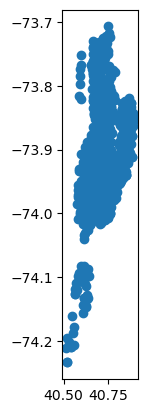

In [15]:
sampled_collisions = collisions.sample(n=1000, random_state=8)
sampled_collisions.plot()
plt.show

In [17]:
sampled_collisions['geometry'] = sampled_collisions.apply(
    lambda x: Point((x['LONGITUDE'], x['LATITUDE'])), axis=1
)

In [18]:
sampled_collisions

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
1048560,08/25/2016,16:15,MANHATTAN,10016.0,40.744442,-73.979065,"(40.744442, -73.979065)",3 AVENUE,EAST 32 STREET,0,...,0,0,0,3507318,Station Wagon/Sport Utility Vehicle,Sedan,0,0,0,POINT (-73.97906 40.74444)
379988,08/09/2019,18:12,0,0,40.619736,-73.989580,"(40.619736, -73.98958)",64 STREET,0,0,...,0,0,0,4186031,Sedan,Sedan,0,0,0,POINT (-73.98958 40.61974)
1286491,07/28/2015,22:20,QUEENS,11436.0,40.677373,-73.792317,"(40.6773731, -73.792317)",147 STREET,120 AVENUE,0,...,Unspecified,0,0,3266751,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,0,0,POINT (-73.79232 40.67737)
1015241,10/14/2016,16:00,BROOKLYN,11222.0,40.724750,-73.947860,"(40.72475, -73.94786)",0,0,143 NASSAU AVENUE,...,0,0,0,3540977,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0,POINT (-73.94786 40.72475)
369649,09/14/2019,17:10,BRONX,10455.0,40.816044,-73.911950,"(40.816044, -73.91195)",WESTCHESTER AVENUE,SAINT ANNS AVENUE,0,...,0,0,0,4206341,Taxi,Station Wagon/Sport Utility Vehicle,0,0,0,POINT (-73.91195 40.81604)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642454,06/07/2018,16:00,0,0,40.672558,-73.998830,"(40.672558, -73.99883)",SMITH STREET,HAMILTON AVENUE,0,...,0,0,0,3916603,Sedan,Sedan,0,0,0,POINT (-73.99883 40.67256)
1850619,11/20/2012,20:30,MANHATTAN,10003,40.734837,-73.983113,"(40.7348371, -73.983113)",2 AVENUE,EAST 18 STREET,0,...,0,0,0,22674,UNKNOWN,BICYCLE,0,0,0,POINT (-73.98311 40.73484)
2045829,11/19/2023,10:47,BROOKLYN,11208.0,40.665886,-73.864560,"(40.665886, -73.86456)",0,0,1208 STANLEY AVENUE,...,0,0,0,4680169,Sedan,0,0,0,0,POINT (-73.86456 40.66589)
80111,10/21/2021,12:22,BRONX,10457.0,40.843824,-73.910367,"(40.8438242, -73.9103666)",SELWYN AVENUE,EAST 173 STREET,0,...,0,0,0,4469531,Station Wagon/Sport Utility Vehicle,0,0,0,0,POINT (-73.91037 40.84382)


In [19]:
my_map = folium.Map(
    location=[40.7,-74],
    zoom_start=9,
    tiles='Stamen Terrain'
)

basemaps = {
    'Google Maps' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Google Satellite' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Google Terrain' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Google Satellite Hybrid' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Esri Satellite' : folium.TileLayer(
        tiles= 'https://server.arcgisionline.com/ArcGIS/reset/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    )
}

basemaps['Google Satellite Hybrid'].add_to(my_map)
folium.GeoJson(sampled_collisions).add_to(my_map)
plugins.Fullscreen().add_to(my_map)
my_map